In [11]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, '$x$')

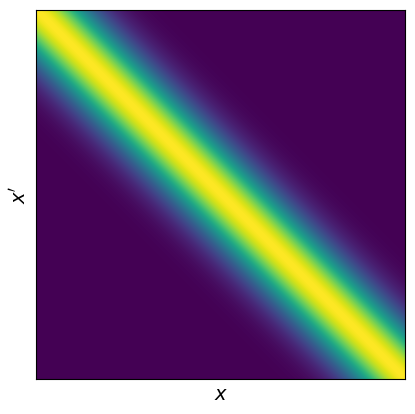

In [12]:
def rbf_kernel(x1, x2, params):
    l = params[1:]
    sq_dist = (x1 - x2)**2 / l
    return params[0] * np.exp(-1/2 * sq_dist)

#vectorized version of the kernel
def rbf_kernel_vectorized(X1, X2, params):
    l = params[1:]
    sq_dist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return params[0] * np.exp(-1/2 * sq_dist / l)

x = np.linspace(0,10,1000)[:,None]

K = rbf_kernel_vectorized(x, x, [1, 1])
plt.imshow(K,origin="upper")
#no ticks
plt.xticks([])
plt.yticks([])
plt.ylabel("$x'$",fontsize=14)
plt.xlabel("$x$",fontsize=14)


In [13]:
def set_up_plot():
    fig, ax = plt.subplots(figsize=(9,6))
    ax.set_ylabel("y")
    ax.set_xlabel("x")
    return fig, ax

c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


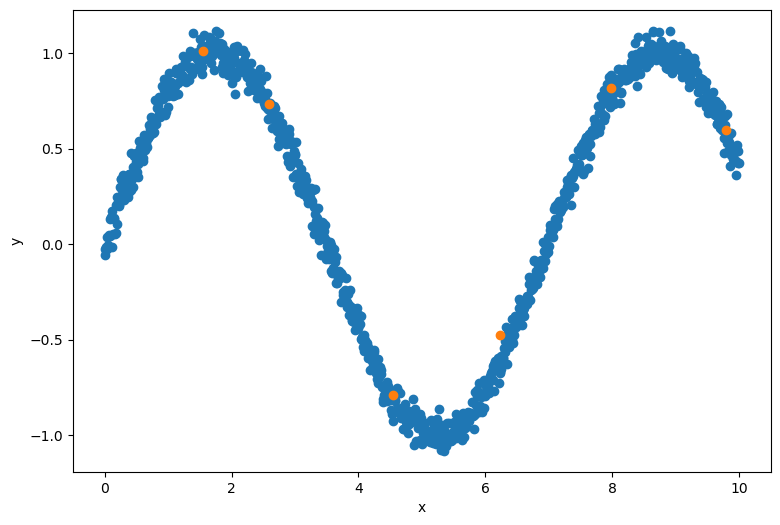

In [22]:
#create random data
from scipy.stats.qmc import Sobol
rng = np.random.RandomState(50)
def gen_tagets(x, noise_var,true_function=False):
    if true_function:
        return np.sin(0.9*x).flatten()
    return np.sin(0.9*x).flatten() + noise_var * np.random.randn(x.shape[0])

y_val = gen_tagets(x, noise_var=0.05)
x_train = Sobol(1,seed=1).random(6).flatten()[:,None] * 10
y_train = gen_tagets(x_train, noise_var=0.05)

fig, ax = set_up_plot()
ax.plot(x,y_val,"o",label = "validation data")
ax.plot(x_train,y_train,"o",label = "training data")



(-2.0289173722506586, 2.325918582002218)

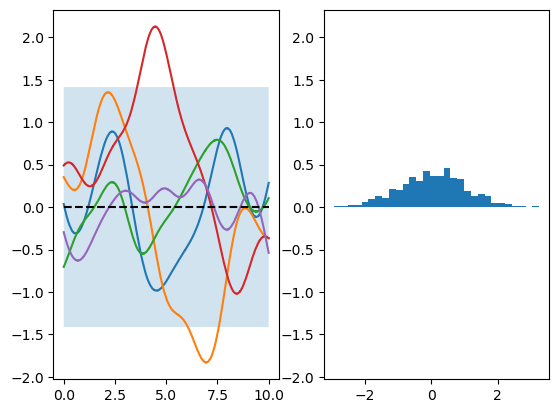

In [23]:
K = rbf_kernel_vectorized(x, x, [0.5, 1])
rng = np.random.RandomState(4)

n_sample = 5
L = np.linalg.cholesky(K + 1e-6*np.eye(x.shape[0]))
f_prior = np.dot(L, rng.normal(size=(x.shape[0], n_sample)))
fig, ax = plt.subplots(1,2)
ax = ax.flatten()
ax[0].plot(x, f_prior)
ax[0].plot(x, np.zeros(x.shape[0]), "k--")
#plot variance of the prior
ax[0].fill_between(x.flatten(), 2*np.sqrt(np.diag(K)), -2*np.sqrt(np.diag(K)), alpha=0.2)
#now plot on the y axis of the second axis a gaussian curve



#plot distribution of the y axis( so basically a norma distriburing with mean 0 and variance 1) and plot it onto the y axis. i want it to look like one plot and then the second plot is the y axis
y = np.random.normal(0,1,1000)
ax[1].hist(y, bins=30, density=True)
ax[1].set_ylim(ax[0].get_ylim())




(-3.0, 3.0)

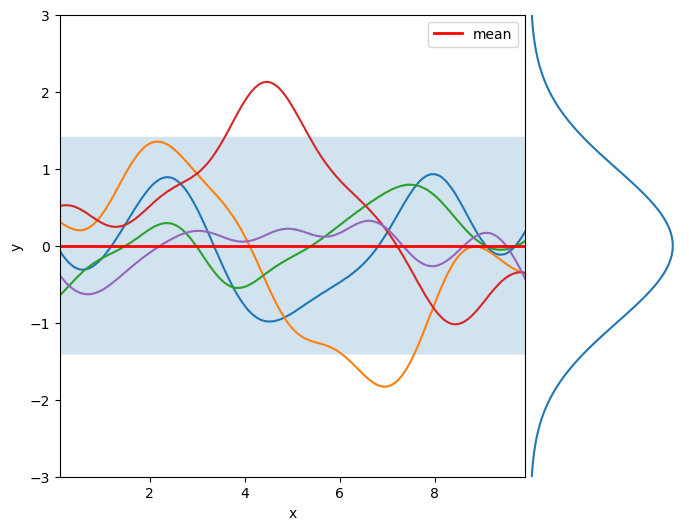

In [141]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Your existing code
K = rbf_kernel_vectorized(x, x, [0.5, 1])
rng = np.random.RandomState(4)

n_sample = 5
L = np.linalg.cholesky(K + 1e-6*np.eye(x.shape[0]))
f_prior = np.dot(L, rng.normal(size=(x.shape[0], n_sample)))

# New code for creating subplots of different sizes
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[:, 0])

ax0.plot(x, f_prior)
ax0.plot(x, np.zeros(x.shape[0]), "r",linewidth=2, label="mean")
ax0.fill_between(x.flatten(), 2*np.sqrt(np.diag(K)), -2*np.sqrt(np.diag(K)), alpha=0.2)
ax0.set_ylim(-3, 3)
ax0.set_xlim(0.1, 9.9)
ax0.set_ylabel("y")
ax0.set_xlabel("x")
ax0.legend()
# New code for vertical Gaussian plot
x_values = np.linspace(-3, 3, 120)
y_values = norm.pdf(x_values, 0, 1)
ax1 = plt.subplot(gs[:, 1])
ax1.plot(y_values, x_values)

# Remove axis from second plot
ax1.axis('off')

# Adjust subplot parameters to bring plots closer together
plt.subplots_adjust(wspace=0)

# Set y-axis limits of second plot to match first plot
ax1.set_ylim(ax0.get_ylim())

<Figure size 640x480 with 0 Axes>

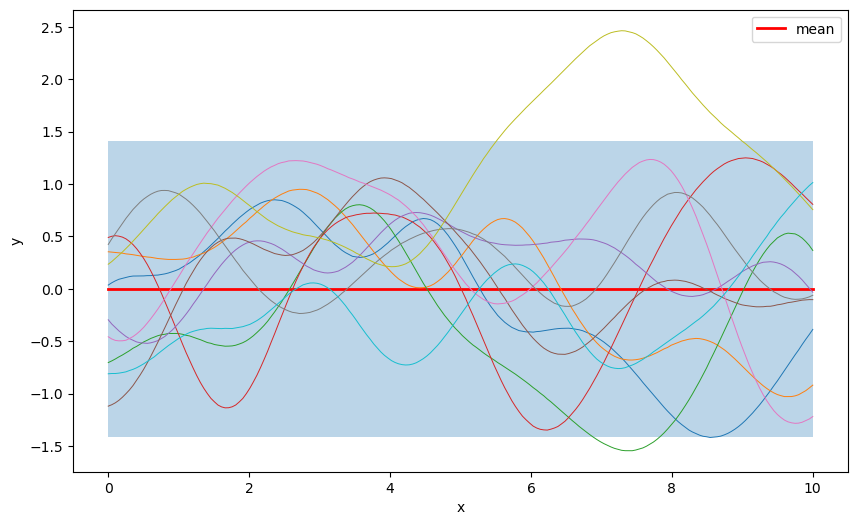

<Figure size 640x480 with 0 Axes>

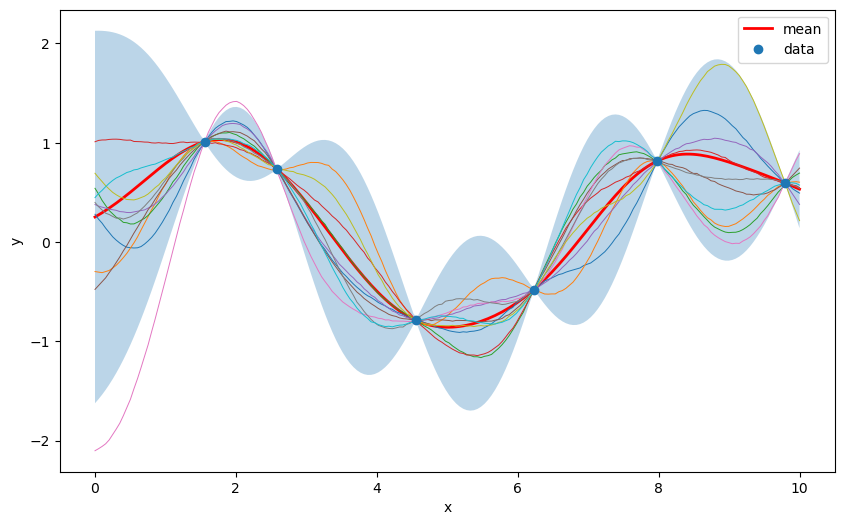

<Figure size 640x480 with 0 Axes>

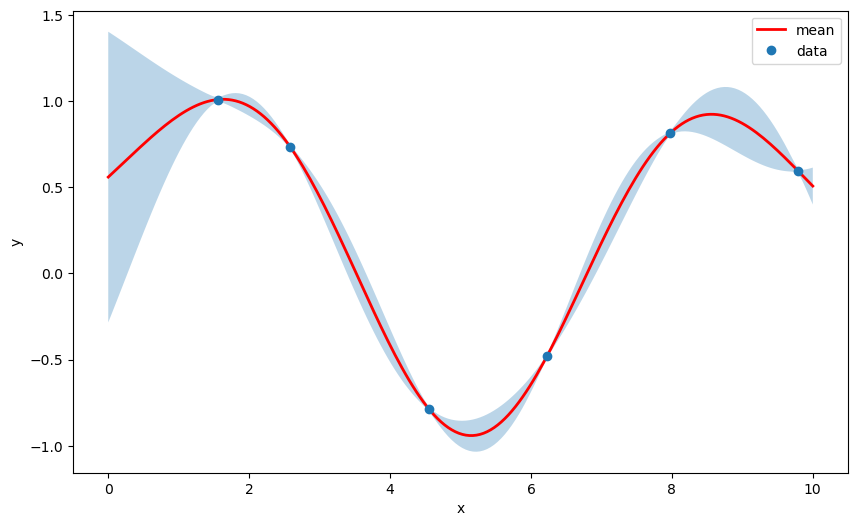

In [152]:
# Sample some input points and noisy versions of the function evaluated at
# these points. 
n = 200   
Xtest = np.linspace(0, 10, n).reshape(-1,1)

K = rbf_kernel_vectorized(Xtest, Xtest, [0.5, 1])
rng = np.random.RandomState(4)

n_sample = 10
L = np.linalg.cholesky(K + 1e-6*np.eye(Xtest.shape[0]))
f_prior = np.dot(L, rng.normal(size=(Xtest.shape[0], n_sample)))

plt.figure(3)
plt.clf()
plt.figure(figsize=(10,6))

plt.plot(Xtest, np.zeros(len(Xtest)), 'red', linewidth=2, label="mean")
plt.plot(Xtest, f_prior, linewidth=0.7)

plt.fill_between(Xtest.flatten(), 2*np.sqrt(np.diag(K)), -2*np.sqrt(np.diag(K)),alpha = 0.3)
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()



N = 6        # number of existing observation points (training points).
     # number of test points.
s = 0.00005    # noise variance.

X = x_train    # N training points 
y = y_train
params = [1, 1]  # params = [sigma_f, l]
K = rbf_kernel_vectorized(X, X,params)
L = np.linalg.cholesky(K + s*np.eye(N))     # line 1 

# points we're going to make predictions at.


# compute the mean at our test points.
Lk = np.linalg.solve(L, rbf_kernel_vectorized(X, Xtest,params))   # k_star = kernel(X, Xtest), calculating v := l\k_star
mu = np.dot(Lk.T, np.linalg.solve(L, y))    # \alpha = np.linalg.solve(L, y) 

# compute the variance at our test points.
K_ = rbf_kernel_vectorized(Xtest, Xtest,params)                  # k(x_star, x_star)        
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)   
s = np.sqrt(s2)


# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-5*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, rng.normal(size=(n,10)))  # size=(n, m), m shown how many posterior  

plt.figure(3)
plt.clf()
plt.figure(figsize=(10,6))

plt.plot(Xtest, mu, 'red', linewidth=2, label="mean")
plt.plot(Xtest, f_post, linewidth=0.7)
plt.plot(X, y, 'o', label="data")
plt.fill_between(Xtest.flat, mu-2*s, mu+2*s,alpha = 0.3)
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()
#plt.axis([-5, 5, -3, 3])
#plt.savefig('post.png', bbox_inches='tight', dpi=600)

#optimize the hyperparameters
from scipy.optimize import minimize

def neg_log_likelihood(params, X, y):
    K = rbf_kernel_vectorized(X, X, params)
    L = np.linalg.cholesky(K + 0.0005*np.eye(X.shape[0]))
    alpha = np.linalg.solve(L.T, np.linalg.solve(L, y))
    return np.sum(np.log(np.diagonal(L))) + 0.5 * y.T @ alpha + 0.5 * len(X) * np.log(2*np.pi)

params = [1, 1]
res = minimize(neg_log_likelihood, params, args=(X, y), bounds=((1e-5, None), (1e-5, None)))
params = res.x

K = rbf_kernel_vectorized(X, X, params)
L = np.linalg.cholesky(K + 0.00005*np.eye(X.shape[0]))
alpha = np.linalg.solve(L.T, np.linalg.solve(L, y))

K_star = rbf_kernel_vectorized(X, Xtest, params)
mu = K_star.T @ alpha

K_ = rbf_kernel_vectorized(Xtest, Xtest, params)
s2 = np.diag(K_) - np.sum((np.linalg.solve(L, K_star))**2, axis=0)
s = np.sqrt(s2)

#same plot stype as before




plt.figure(3)
plt.clf()
plt.figure(figsize=(10,6))
plt.plot(Xtest, mu, 'red', linewidth=2, label="mean")
plt.plot(X, y, 'o', label="data")
plt.fill_between(Xtest.flat, mu-2*s, mu+2*s,alpha = 0.3)
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


(1000, 1000)


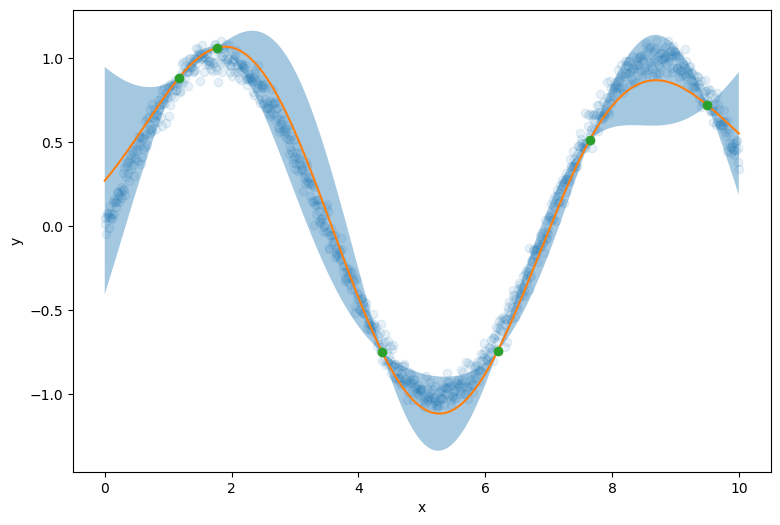

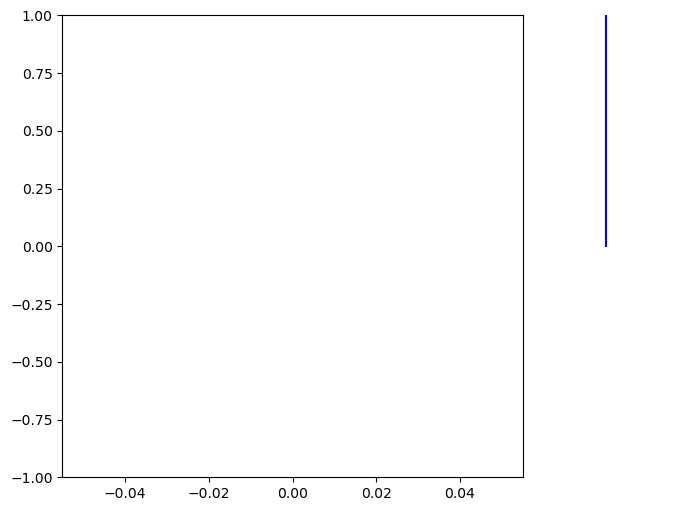

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
x = np.linspace(0,10,1000)[:,None]
kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gp.fit(x_train, y_train)

y_pred, sigma = gp.predict(x, return_std=True)

fig, ax = set_up_plot()
ax.plot(x, y_val, "o", label="validation data",alpha = 0.1)
ax.plot(x, y_pred, label="prediction")
ax.fill_between(x.flatten(), y_pred - 2*sigma, y_pred + 2*sigma, alpha=0.4)
ax.plot(x_train, y_train, "o", label="training data")



#make a 2d plot in the x-y plane and plot the probability density function of the gaussian process

y = np.linspace(-1,1,1000)[:,None]

prob_density = np.zeros((x.shape[0], y.shape[0]))
for i in range(x.shape[0]):
    prob_density[i] = norm.pdf(y, y_pred[i], sigma[i]).flatten()
print(prob_density.shape)



fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[:, 0])
ax0.set_ylim(-1, 1)
ax1 = plt.subplot(gs[:, 1])

# Remove axis from second plot
ax1.axis('off')

# Adjust subplot parameters to bring plots closer together
plt.subplots_adjust(wspace=0.02)

# Set y-axis limits of second plot to match first plot
ax1.set_ylim(ax0.get_ylim())

line, = ax0.plot([], [], 'r-')  # line for the moving vertical line
pdf_line, = ax1.plot([], [], 'b-')  # line for the probability density

def animate(i):
    line.set_data([x[i], x[i]], [np.min(f_prior), np.max(f_prior)])  # update the position of the vertical line
    y_values = norm.pdf(x, x[i], 0.1)  # calculate the probability density
    pdf_line.set_data(y_values, x)  # update the probability density plot
    return line, pdf_line

ani = FuncAnimation(fig, animate, frames=len(x), blit=True)
ani.save('animation.gif', writer='imagemagick')



MovieWriter imagemagick unavailable; using Pillow instead.


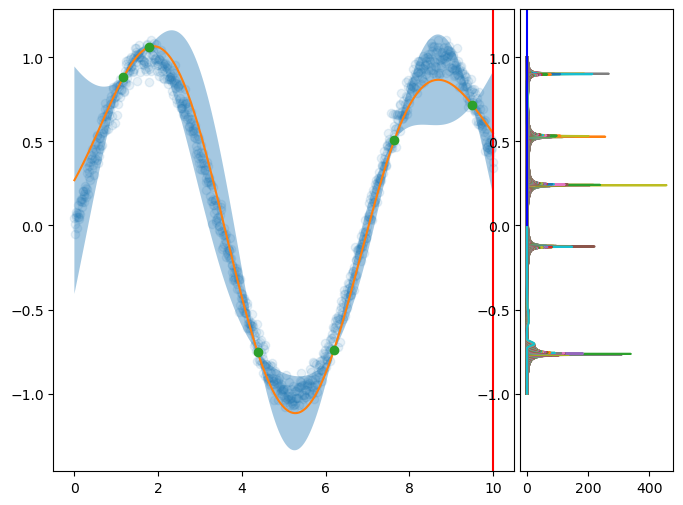

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.linspace(0,10,1000)[:,None]
kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gp.fit(x_train, y_train)

y_pred, sigma = gp.predict(x, return_std=True)

#make a 2d plot in the x-y plane and plot the probability density function of the gaussian process
y = np.linspace(-1,1,1000)[:,None]
prob_density = np.zeros((x.shape[0], y.shape[0]))
for i in range(x.shape[0]):
    prob_density[i] = norm.pdf(y, y_pred[i], sigma[i]).flatten()

fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[:, 0])
ax1 = plt.subplot(gs[:, 1])

# Plot the data on the first plot
ax0.plot(x, y_val, "o", label="validation data",alpha = 0.1)
ax0.plot(x, y_pred, label="prediction")
ax0.fill_between(x.flatten(), y_pred - 2*sigma, y_pred + 2*sigma, alpha=0.4)
ax0.plot(x_train, y_train, "o", label="training data")

# Plot the probability density on the second plot
ax1.plot(prob_density, y)

# Adjust subplot parameters to bring plots closer together
plt.subplots_adjust(wspace=0.02)

# Set y-axis limits of second plot to match first plot
ax1.set_ylim(ax0.get_ylim())

line, = ax0.plot([], [], 'r-')  # line for the moving vertical line
pdf_line, = ax1.plot([], [], 'b-')  # line for the probability density

def animate(i):
    line.set_data([x[i], x[i]], [np.min(f_prior), np.max(f_prior)])  # update the position of the vertical line
    y_values = norm.pdf(x, x[i], 0.1)  # calculate the probability density
    pdf_line.set_data(y_values, x)  # update the probability density plot
    return line, pdf_line

ani = FuncAnimation(fig, animate, frames=len(x), blit=True)
ani.save('animation.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


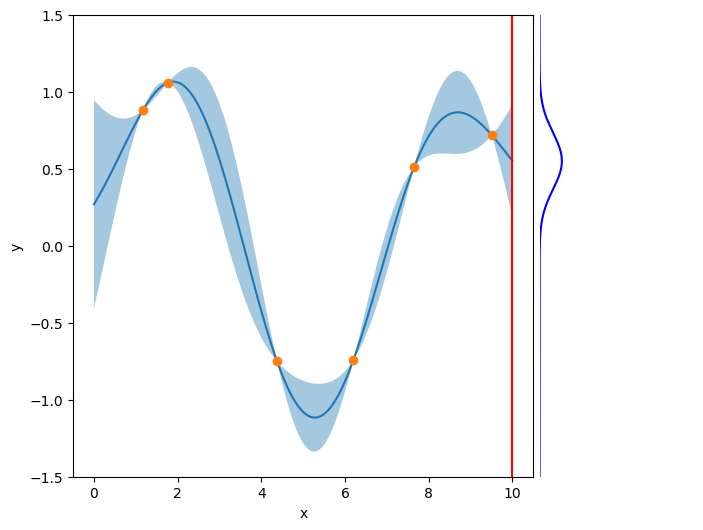

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.linspace(0,10,1000)[:,None]
kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gp.fit(x_train, y_train)

y_pred, sigma = gp.predict(x, return_std=True)

#make a 2d plot in the x-y plane and plot the probability density function of the gaussian process
y = np.linspace(-1.5,1.5,1000)[:,None]

fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[:, 0])
ax0.set_ylim(-1.5, 1.5)
ax1 = plt.subplot(gs[:, 1])

# Plot the data on the first plot
#ax0.plot(x, y_val, "o", label="validation data",alpha = 0.1)
ax0.plot(x, y_pred, label="prediction")
ax0.fill_between(x.flatten(), y_pred - 2*sigma, y_pred + 2*sigma, alpha=0.4)
ax0.plot(x_train, y_train, "o", label="training data")
ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax1.set_xlabel("p(y|x)")
# Adjust subplot parameters to bring plots closer together
plt.subplots_adjust(wspace=0.02)

# Set y-axis limits of second plot to match first plot
ax1.set_ylim(ax0.get_ylim())
ax1.set_xlim(0, 30)
#no y axis for second ax
ax1.axis('off')
line, = ax0.plot([], [], 'r-')  # line for the moving vertical line
pdf_line, = ax1.plot([], [], 'b-')  # line for the probability density

def animate(i):
    line.set_data([x[i], x[i]], [-1.5, 1.5])  # update the position of the vertical line
    y_values = 2*norm.pdf(y, y_pred[i], sigma[i]).flatten()  # calculate the probability density
    pdf_line.set_data(y_values, y)  # update the probability density plot
    return line, pdf_line

ani = FuncAnimation(fig, animate, frames=len(x), blit=True,interval=50)
ani.save('animation.gif', writer='imagemagick')